In [44]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import config
import numpy as np
import pandas as pd
import collections
import time
import config ## TODO decide whether to use this or not, or to provide some sort of different option for these variables.
import matplotlib.pyplot as plt


data = pd.read_csv("../datasets/kddcup_data_10_percent_corrected.csv", header = None)


df_results = pd.read_csv("../results_test/20190531-163702.csv")
print(df_results.head())
print(df_results.dtypes)

  predicted    readInTime  processTime  latency  Label
0    [1.00]  265777575474         1612   101851      1
1    [1.00]  265777677520         2174     2317      1
2    [1.00]  265777678374         3509     4977      1
3    [1.00]  265777777458         2021     2028      1
4    [1.00]  265777778540         5144     6173      1
predicted      object
readInTime      int64
processTime     int64
latency         int64
Label           int64
dtype: object


In [2]:


    #####
    ##### Metric Calculation Section
    #####

def caclulateErr(results, Print=False):
    df =pd.DataFrame()
    df["result"] = results["predicted"].str.strip("[]")
    df["truth"] = results["Label"]
    df['result'] = df['result'].astype(np.float64)
    df['truth'] = df['truth'].astype(np.float64)
    res =df.loc[~(df['result'] == df['truth'])]
    output ="error rate: {}%".format(len(res)/len(results)*100)
    if Print:
        print(output)
    return output


def caclulateLatency(results, vRate=None, Print=False):
    df =pd.DataFrame()    
    df['latency'] = results['latency'].astype(np.float64)
    #if isinstance(le_list,(,)):
    #df['vRate'] = vRate
    res =df.loc[~(df['latency'] >= config.LATENCYBOUND)]
    output ="exceed rate: {}%".format(len(res)/len(results)*100)
    if Print:
        print(output)

    vFig =plt.figure()
    vAx = vFig.add_subplot(1,1,1)
    vYRate = np.arange(0,len(vRate),config.READERINTERVAL)
    vAx.plot(vRate)

    return output



In [15]:
# vRate=np.linspace(1,100,100)
# vRate=np.append(vRate,np.linspace(100,1,100))
# print(vRate)
# #print(len(vYRate)* config.READERINTERVAL)
# print(config.READERINTERVAL)

# vYRate = np.arange(0,len(vRate)* config.READERINTERVAL,config.READERINTERVAL)
# vYRate = vYRate.ravel()
# print(vYRate)

vRate=np.linspace(1,100,100)
print(vRate)

[   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.
   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.
   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.
   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.
   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.
   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.
   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.
   97.   98.   99.  100.]


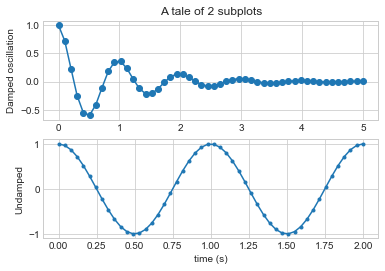

In [11]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

predicted      object
readInTime      int64
processTime     int64
latency         int64
Label           int64
dtype: object
lastrow 4950.0 datasize 825
larger then
    vRate  vInterval
0     1.0        0.0
1     2.0        1.0
2     3.0        3.0
3     4.0        6.0
4     5.0       10.0
5     6.0       15.0
6     7.0       21.0
7     8.0       28.0
8     9.0       36.0
9    10.0       45.0
10   11.0       55.0
11   12.0       66.0
12   13.0       78.0
13   14.0       91.0
14   15.0      105.0
15   16.0      120.0
16   17.0      136.0
17   18.0      153.0
18   19.0      171.0
19   20.0      190.0
20   21.0      210.0
21   22.0      231.0
22   23.0      253.0
23   24.0      276.0
24   25.0      300.0
25   26.0      325.0
26   27.0      351.0
27   28.0      378.0
28   29.0      406.0
29   30.0      435.0
30   31.0      465.0
31   32.0      496.0
32   33.0      528.0
33   34.0      561.0
34   35.0      595.0
35   36.0      630.0
36   37.0      666.0
37   38.0      703.0
38   39.0      74

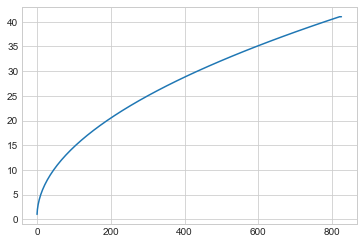

In [43]:
def expandVRate(vRate, data):
    valSum=0;
    newVRate =pd.DataFrame()
    addonRate = pd.DataFrame()
    newVRate['vRate'] = vRate
    newVRate['vInterval'] = np.nan
    for i in range(len(vRate)):
#         print(i)
        newVRate['vInterval'][i] = valSum
#         print("val:{}".format(newVRate['vRate'][i]))
        valSum += newVRate['vRate'][i]
    lastRow = newVRate.iloc[-1]
    print("lastrow {} datasize {}".format(lastRow['vInterval'],len(data)))
    dataSize = len(data)
    if lastRow['vInterval'] < dataSize:        
        for i in range(abs(len(newVRate) - len(data))):
    #   row = {"vRate":lastRow['vRate'],"vIntervnal":valSum}
            addonRate = addonRate.append( {"vRate":lastRow['vRate'],"vInterval":valSum}, ignore_index=True)
            valSum += addonRate['vRate'][i]    
    elif lastRow['vInterval'] > len(data):
        #loop through the vRate to find the point that matches the size of results. slice the vRate at that point.
        #actually just c
#       print("newRate {}".format(newVRate))
        maxLen = len(data)        
        for i in range(maxLen):            
            if newVRate['vInterval'][i] > maxLen:
                print("larger then")
                #slice here and add new ending point of the vRate with interval equal to maxlen
                newVRate = newVRate.iloc[0:i]
                print(newVRate)
                newVRate = newVRate.append({"vRate":newVRate['vRate'][i-1],"vInterval":maxLen}, ignore_index=True)
                break
            elif newVRate['vInterval'][i] == maxLen:
                print("same size")
                #slice directly here
                newVRate = newVRate.iloc[0:i]    
                break            
    return newVRate 

# print(expandVRate(vRate, df_results))
fig2 = plt.figure()
print(df_results.dtypes)
newRate = expandVRate(vRate, df_results)
# print(newRate.head())
plt.plot(newRate['vInterval'],newRate['vRate'])

[]

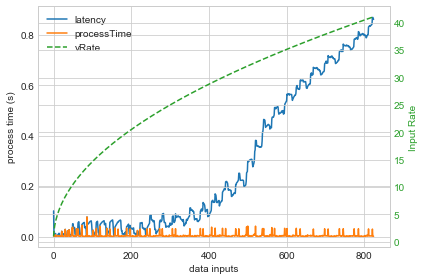

In [45]:
from datetime import datetime, timedelta
epoch = datetime(1601, 1, 1)


# print(df_results.head())
fig, ax1 = plt.subplots()

# ax = plt.axes()
color = 'tab:blue'
ax1.set_xlabel('data inputs')
ax1.set_ylabel('process time (s)')
lns1 = ax1.plot(df_results['latency'].astype(np.float64) /1000000)
lns2 = ax1.plot(df_results['processTime'].astype(np.float64)/1000000)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Input Rate (data points per interval)', color=color)
lns3 = ax2.plot(vRateNew['vInterval'],vRateNew['vRate'], color=color, linestyle = 'dashed')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.plot()

# ax.plot(vYRate)

# ax2 = ax.twinx()
# color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, vYRate, color=color)
# ax2.tick_params(axis='y', labelcolor=color)


[ 0.          0.01000984  0.02001868  0.03002552  0.04002934  0.05002916
  0.06002396  0.07001275  0.07999452  0.08996827  0.09993302  0.10988774
  0.11983146  0.12976317  0.13968188  0.14958659  0.15947632  0.16935006
  0.17920684  0.18904566  0.19886554  0.20866549  0.21844453  0.22820168
  0.23793597  0.24764642  0.25733206  0.26699191  0.276625    0.28623038
  0.29580708  0.30535414  0.3148706   0.32435552  0.33380793  0.3432269
  0.35261147  0.36196071  0.37127369  0.38054946  0.3897871   0.39898569
  0.4081443   0.41726201  0.42633791  0.4353711   0.44436066  0.45330569
  0.46220531  0.47105861  0.47986471  0.48862273  0.49733179  0.50599102
  0.51459954  0.52315651  0.53166105  0.54011232  0.54850948  0.55685167
  0.56513807  0.57336784  0.58154016  0.58965421  0.59770917  0.60570425
  0.61363863  0.62151153  0.62932216  0.63706972  0.64475345  0.65237258
  0.65992634  0.66741398  0.67483474  0.68218788  0.68947267  0.69668838
  0.70383427  0.71090964  0.71791378  0.72484599  0.

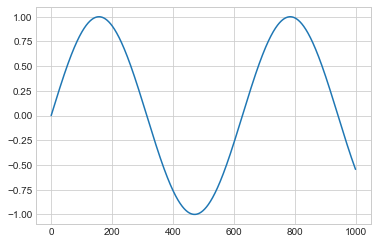

In [7]:
plt.style.use('seaborn-whitegrid')
x = np.linspace(0, 10, 1000)
X = np.sin(x)
fig = plt.figure()
ax = plt.axes()
ax.plot(np.sin(x))
print(X)

(16,)
(1,)


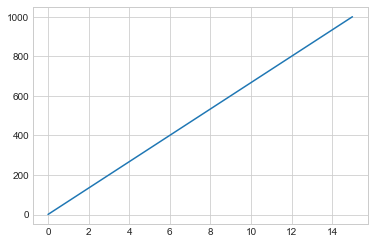

In [8]:
vFig =plt.figure()
vAx = vFig.add_subplot(1,1,1)
vYRate = np.arange(0,len(vRate),config.READERINTERVAL)
print(vRate.shape)
print(vYRate.shape)
vAx.plot(vRate)

'exceed rate: 45.93939393939394%'

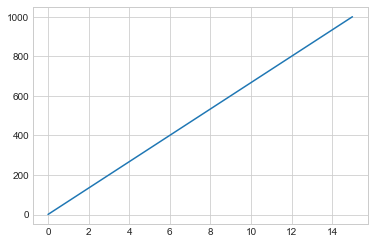

In [9]:
caclulateErr(df_results)
caclulateLatency(df_results, vRate)